## Summary of 1A (MCO-ATL)
###### Below is a summary of the findings in 1A for dataset MCO-ATL. After this summary is a detailed section on the python code and charts. 

#### Data quality
##### 1. There are no duplicate entries
##### 2. Some outliers were discovered in prices, requiring removal during analysis

#### Analysis
##### 1. Departure time and prices see no correlation. 

##### 2. Prices range from lowest at 420 USD in September 2024 to peaking near late November (thanksgiving in the US), Christmas period, and late April. At the peak, prices can go up to >700 USD. 

##### 3. Direct operators Spirit (NK) and Frontier (F9) offer much lower fares - at around 62 USD and 60 USD respectively. They only offer Economy.

##### 4. For flight products with one or more stops, there are 14 other airlines that sell these products. The prices range from 200 to 800. In essence these products would not appeal to the customer at all as their travel duration is higher while also being priced higher than a direct flight. 

##### 5. Travel duration generally has no correlation with price. 

##### 6. Non-stop flights are at an average of 60 USD while indirect flights are near 600 USD one way,

##### 7. Same as CDG-JFK fare prices, departure times are a factor too. For flights departing from Orlando (MCO), prices are consistent throughout the day beginning from 5 am to early evening. The same goes for flights departing from Atlanta (ATL). These reflect the nature of doemstic US shuttle flights being commuter flights (with average flight duration of MCO-ATL at 90 minutes).

##### 9. Likewise, prices are higher on sundays and mondays, and Fridays. The hypothesis would be that these flights serve more business, commuters than leisure. 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

In [30]:
df = pd.read_csv('ATL-MCO.csv')
print(df.head())


                                              PK_FLD SCRAPE_DATE  \
0  ONE_WAY-MCO-ATL-2023/09/25-1_UA2387_UA1210-ECO...  2023-09-25   
1  ONE_WAY-MCO-ATL-2023/09/25-1_UA2264_UA2642-ECO...  2023-09-25   
2  ONE_WAY-MCO-ATL-2023/09/25-1_UA2407_UA2329-ECO...  2023-09-25   
3  ONE_WAY-MCO-ATL-2023/09/25-1_UA1451_UA1940-ECO...  2023-09-25   
4  ONE_WAY-MCO-ATL-2023/09/25-1_UA2169_UA2444-ECO...  2023-09-25   

                   TASK_KEY       IDENTIFIER TRIP_TYPE   PRICE CURRENCY  \
0  US-intra_MCO-ATL_airline  1_UA2387_UA1210   ONE_WAY  378.22      USD   
1  US-intra_MCO-ATL_airline  1_UA2264_UA2642   ONE_WAY  402.91      USD   
2  US-intra_MCO-ATL_airline  1_UA2407_UA2329   ONE_WAY  319.24      USD   
3  US-intra_MCO-ATL_airline  1_UA1451_UA1940   ONE_WAY  382.33      USD   
4  US-intra_MCO-ATL_airline  1_UA2169_UA2444   ONE_WAY  339.99      USD   

  DEPATURE_CITY ARRIVIAL_CITY              DEPATURE_TIME  ... LEG_2_MINUTE  \
0           MCO           ATL  2023-10-07 11:25:00.000 Z  ... 

# cleaning the data

In [46]:
# Rename the mispelled columns
df = df.rename(columns={'DEPATURE_TIME': 'DEPARTURE_DATETIME', 'ARRIVIAL_TIME': 'ARRIVAL_DATETIME'})

#convert departure and arrival time columns to datetime format
df['DEPARTURE_DATETIME']= pd.to_datetime(df['DEPARTURE_DATETIME'])
df['ARRIVAL_DATETIME']= pd.to_datetime(df['ARRIVAL_DATETIME'])

#Split departure datetime into departure date and departure time columns
df['DEPARTURE_DATE'] = df['DEPARTURE_DATETIME'].dt.date
df['DEPARTURE_TIME'] = df['DEPARTURE_DATETIME'].dt.time

#Split arrival datetime into arrival date and arrival time columns
df['ARRIVAL_DATE'] = df['ARRIVAL_DATETIME'].dt.date
df['ARRIVAL_TIME'] = df['ARRIVAL_DATETIME'].dt.time

print(df.head())

                                              PK_FLD SCRAPE_DATE  \
0  ONE_WAY-MCO-ATL-2023/09/25-1_UA2387_UA1210-ECO...  2023-09-25   
1  ONE_WAY-MCO-ATL-2023/09/25-1_UA2264_UA2642-ECO...  2023-09-25   
2  ONE_WAY-MCO-ATL-2023/09/25-1_UA2407_UA2329-ECO...  2023-09-25   
3  ONE_WAY-MCO-ATL-2023/09/25-1_UA1451_UA1940-ECO...  2023-09-25   
4  ONE_WAY-MCO-ATL-2023/09/25-1_UA2169_UA2444-ECO...  2023-09-25   

                   TASK_KEY       IDENTIFIER TRIP_TYPE   PRICE CURRENCY  \
0  US-intra_MCO-ATL_airline  1_UA2387_UA1210   ONE_WAY  378.22      USD   
1  US-intra_MCO-ATL_airline  1_UA2264_UA2642   ONE_WAY  402.91      USD   
2  US-intra_MCO-ATL_airline  1_UA2407_UA2329   ONE_WAY  319.24      USD   
3  US-intra_MCO-ATL_airline  1_UA1451_UA1940   ONE_WAY  382.33      USD   
4  US-intra_MCO-ATL_airline  1_UA2169_UA2444   ONE_WAY  339.99      USD   

  DEPATURE_CITY ARRIVIAL_CITY        DEPARTURE_DATETIME  ... LEG_3_MINUTE  \
0           MCO           ATL 2023-10-07 11:25:00+00:00  ...   

# Q1A Exploratory data analysis

In [32]:
#check how many duplicates there are in the PK_FLD 
#this helps us check whether we have multiple rows for the same flight
df.duplicated(subset='PK_FLD').sum()


np.int64(0)

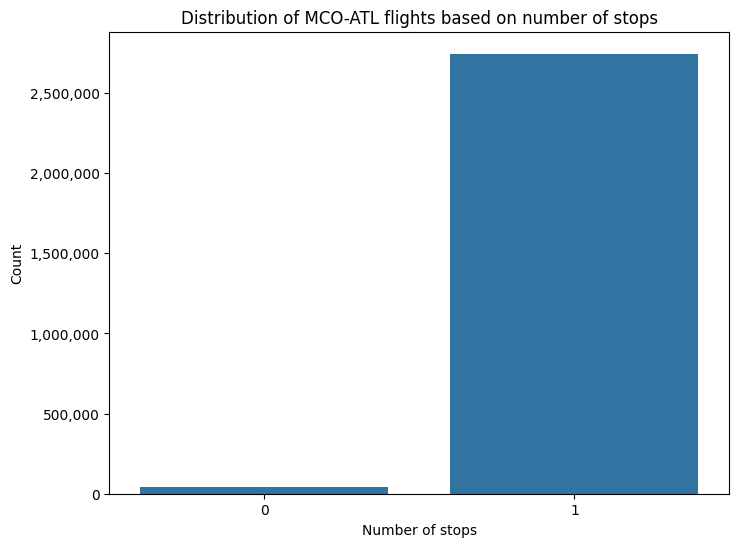

In [33]:
#Create a countplot using on trip types

plt.figure(figsize= (8,6))
sns.countplot(data=df, x='STOPS')
plt.title('Distribution of MCO-ATL flights based on number of stops')
plt.xlabel('Number of stops')
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

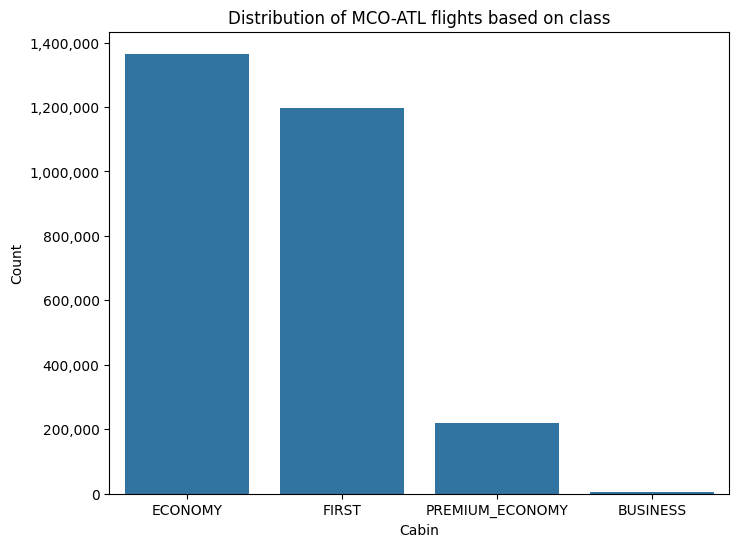

In [34]:
#check distribution of flight inventory between cabins
plt.figure(figsize= (8,6))  
sns.countplot(data=df, x='LEG_1_CABIN')
plt.title('Distribution of MCO-ATL flights based on class')
plt.xlabel('Cabin')
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

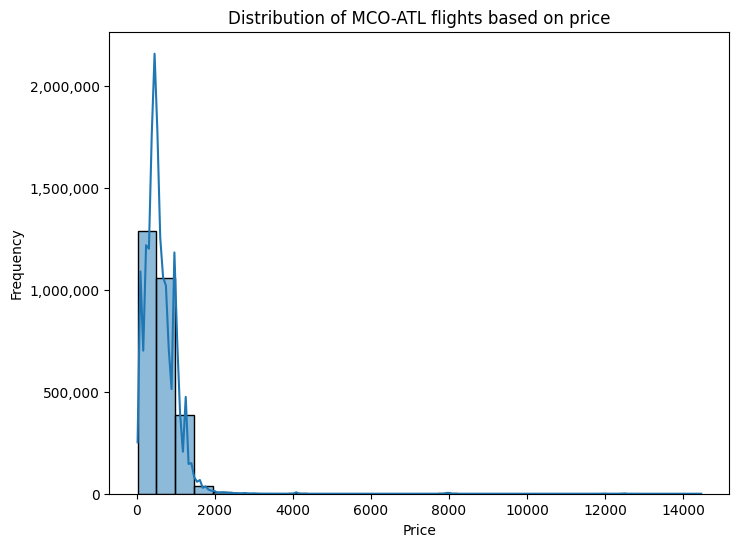

In [35]:
#Check distribution of prices
plt.figure(figsize= (8,6))  
sns.histplot(data=df, x='PRICE',bins=30, kde=True)
plt.title('Distribution of MCO-ATL flights based on price')
plt.xlabel('Price') 
plt.ylabel('Frequency')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show

458.79
-330.48500000000007
1504.6750000000002


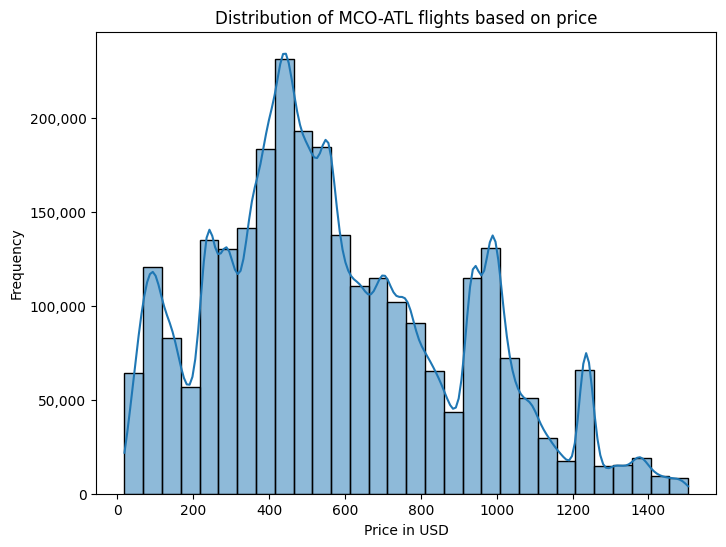

In [36]:
# since the chart shows the outliers, theyre to be removed for a more useful view

#Calculate the interquartile range (IQR) for the price column
q1 = df['PRICE'].quantile(0.25)
q3 = df['PRICE'].quantile(0.75)
iqr = q3 - q1
print(iqr)

#define the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

#filter out outliers from the data
filter_df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

#create a new chart without outliers
plt.figure(figsize= (8,6))  
sns.histplot(data=filter_df, x='PRICE',bins=30, kde=True)
plt.title('Distribution of MCO-ATL flights based on price')
plt.xlabel('Price in USD') 
plt.ylabel('Frequency')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Q1A Pricing analysis
## prices over time

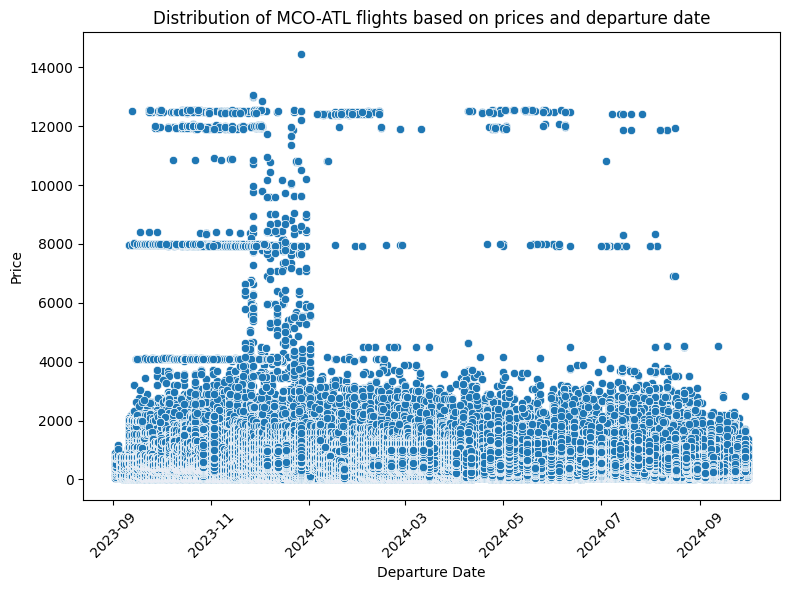

In [ ]:
# Convert the 'DEPARTURE_DATE' column to a datetime object
df['DEPARTURE_DATE'] = pd.to_datetime(df['DEPARTURE_DATE'])

# Create a scatter plot using Seaborn to show the distribution of ticket prices based on departure date
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DEPARTURE_DATE', y='PRICE')
plt.title('Distribution of MCO-ATL flights based on prices and departure date')
plt.xlabel('Departure Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

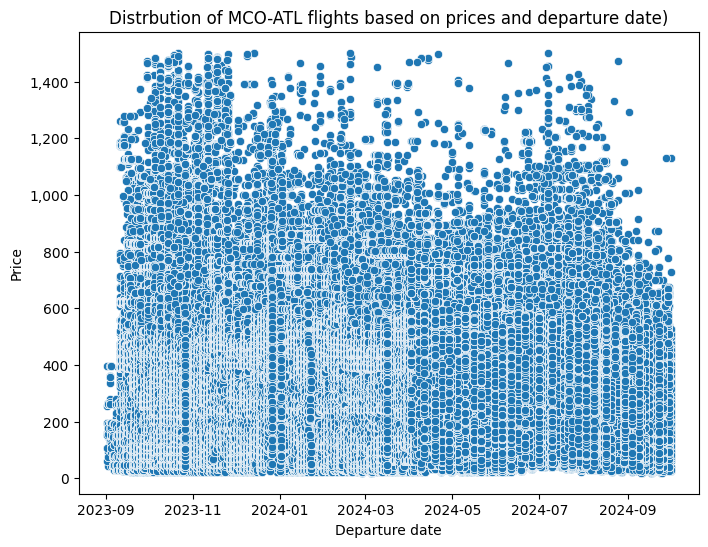

In [ ]:
#scatter plot: price and date
#not too helpful, maybe remove this part
#Convert the Departure date column to a datetime object
df['DEPARTURE_DATE'] = pd.to_datetime(df['DEPARTURE_DATE'])

# Remove outliers from the data
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound) & (df['LEG_1_CABIN'] == 'ECONOMY')]

#Create a scatter plot to show the distribution of ticket prices based on departure date 

plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='DEPARTURE_DATE', y='PRICE')
plt.title('Distrbution of MCO-ATL flights based on prices and departure date)')
plt.xlabel('Departure date')
plt.ylabel('Price') 
formatter = FuncFormatter(lambda x, _: format(int(x), ',')) 
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

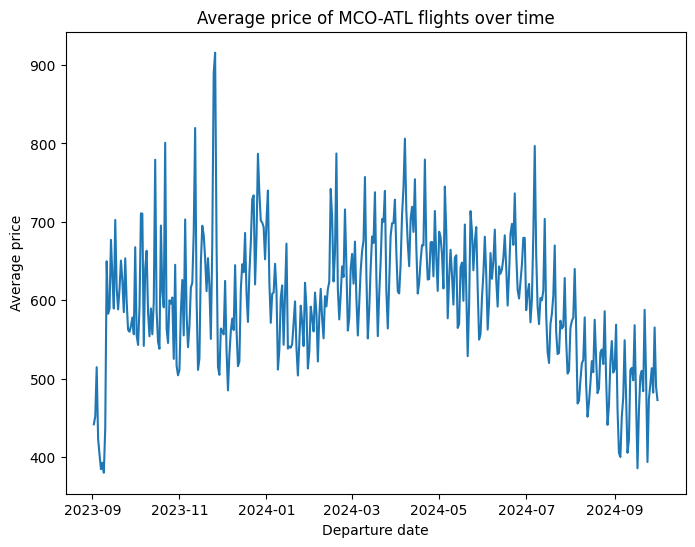

In [ ]:
# Average price by date 
# Convert 'DEPARTURE_DATE' column to a datetime object
df['DEPARTURE_DATE'] = pd.to_datetime(df['DEPARTURE_DATE'])

# Calculate the average price for each departure date
average_prices = df.groupby('DEPARTURE_DATE')['PRICE'].mean().reset_index()

# Create a line chart to show the average price over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_prices, x='DEPARTURE_DATE', y='PRICE')
plt.title('Average price of MCO-ATL flights over time')
plt.xlabel('Departure date')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


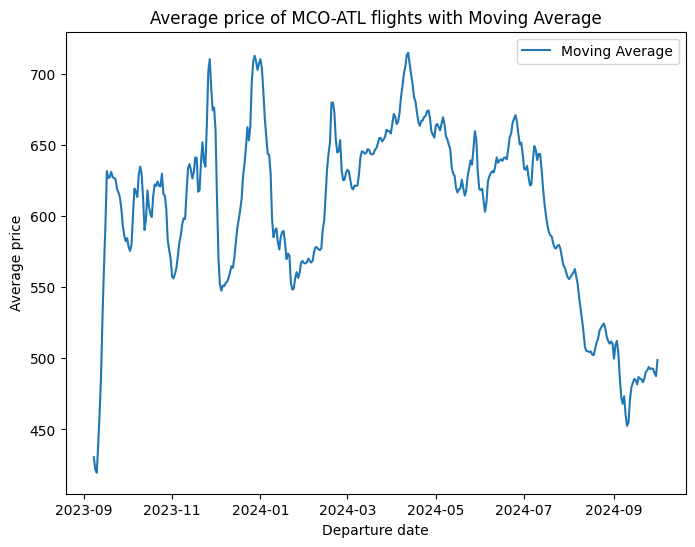

In [ ]:
#7 day moving average price by date
# Calculate the moving average with a window size of 3
average_prices['MA_PRICE'] = average_prices['PRICE'].rolling(window=7).mean()

# Create a line chart with the moving average
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_prices, x='DEPARTURE_DATE', y='MA_PRICE', label='Moving Average')
plt.title('Average price of MCO-ATL flights with Moving Average')
plt.xlabel('Departure date')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

## average prices by airline - direct flights

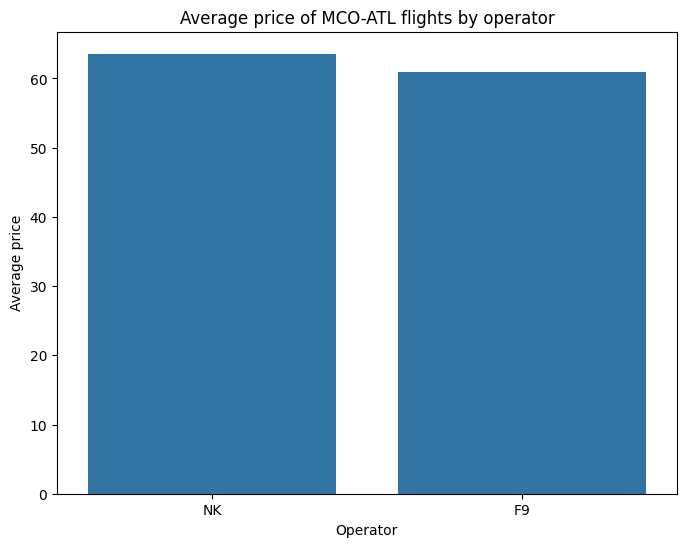

In [ ]:
#filter flights to show non-stop flights only
filtered_df = df[df['STOPS'] == 0]

#calculate the average price by leg_1_operator
average_prices_by_operator = filtered_df.groupby('LEG_1_FLIGHT_OPEATOR')['PRICE'].mean().reset_index()

#rank the operators by average price in the chart
average_prices_by_operator = average_prices_by_operator.sort_values(by='PRICE', ascending=False)

# Create a bar chart to show the average price by operator
plt.figure(figsize=(8, 6))
sns.barplot(data=average_prices_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='PRICE')
plt.title('Average price of MCO-ATL flights by operator')
plt.xlabel('Operator')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)



plt.show()

#average prices by airline, direct flights, split by cabin 

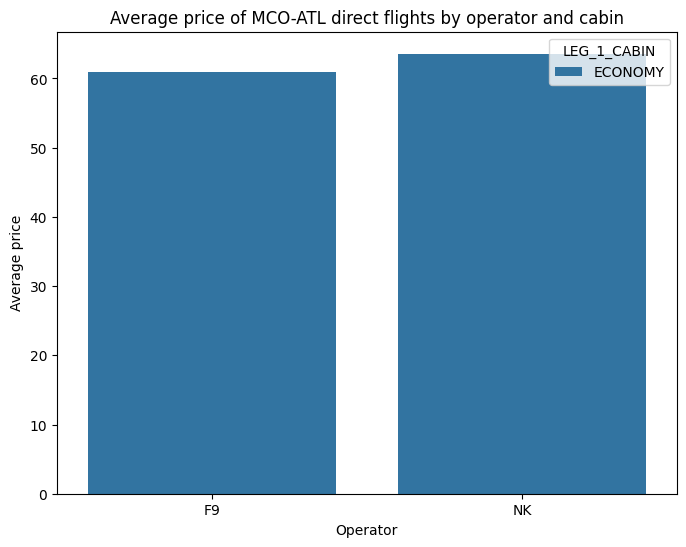

In [ ]:
#filter flights to show non-stop flights only
filtered_df = df[df['STOPS'] == 0]

#Calculate the average price per cabin per operator  
average_prices_by_operator = filtered_df.groupby(['LEG_1_FLIGHT_OPEATOR', 'LEG_1_CABIN'])['PRICE'].mean().reset_index()

#Create a clustered bar chart to show price per cabin per operator
plt.figure(figsize=(8, 6))
sns.barplot(data=average_prices_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='PRICE', hue='LEG_1_CABIN')
plt.title('Average price of MCO-ATL direct flights by operator and cabin')
plt.xlabel('Operator')  
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)


#rank the operators by average price in the chart
average_prices_by_operator = average_prices_by_operator.sort_values(by='PRICE', ascending=False)

plt.show()

## average prices by operator, with 1 or more stops (Review this before submission)

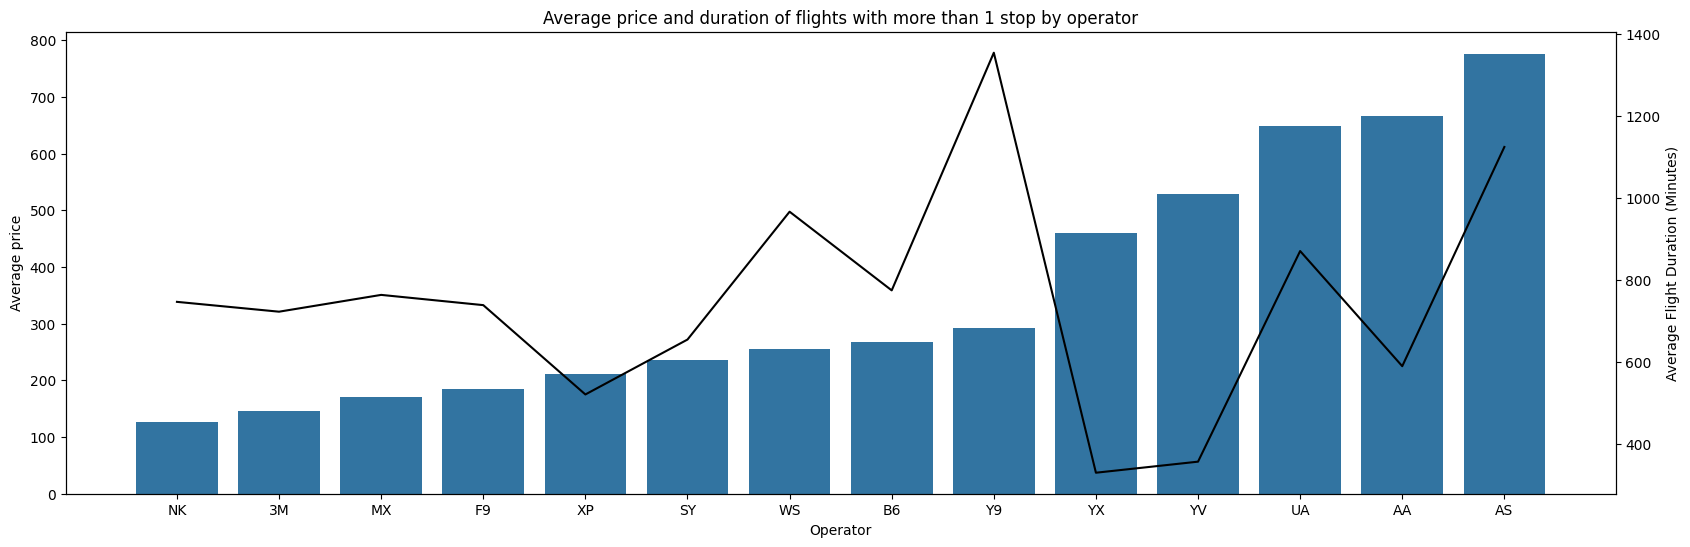

In [ ]:
# Filter flights to show with more than 1 stop
filtered_df = df[df['STOPS'] >= 1]

# Calculate the average price by leg_1_operator
average_prices_by_operator = filtered_df.groupby('LEG_1_FLIGHT_OPEATOR')['PRICE'].mean().reset_index()

# Sort the operators by average price in ascending order
average_prices_by_operator = average_prices_by_operator.sort_values(by='PRICE')

# Calculate the average travel duration by operator
average_minutes_by_operator = filtered_df.groupby('LEG_1_FLIGHT_OPEATOR')['TOTAL_MINUTE'].mean().reset_index()
average_minutes_by_operator['LEG_1_FLIGHT_DURATION'] = average_minutes_by_operator['TOTAL_MINUTE'].astype(int)

# Create a new figure
plt.figure(figsize=(20, 6))

# Create the bar chart to show the average price by operator
ax1 = plt.gca()
sns.barplot(data=average_prices_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='PRICE', ax=ax1)
ax1.set_title('Average price and duration of flights with more than 1 stop by operator')
ax1.set_xlabel('Operator')
ax1.set_ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
ax1.yaxis.set_major_formatter(formatter)

# Create a secondary y-axis for the travel duration
ax2 = ax1.twinx()
sns.lineplot(data=average_minutes_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='LEG_1_FLIGHT_DURATION', color='black', ax=ax2)
ax2.set_ylabel('Average Flight Duration (Minutes)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Understanding relationship between travel duration and price - no correlation

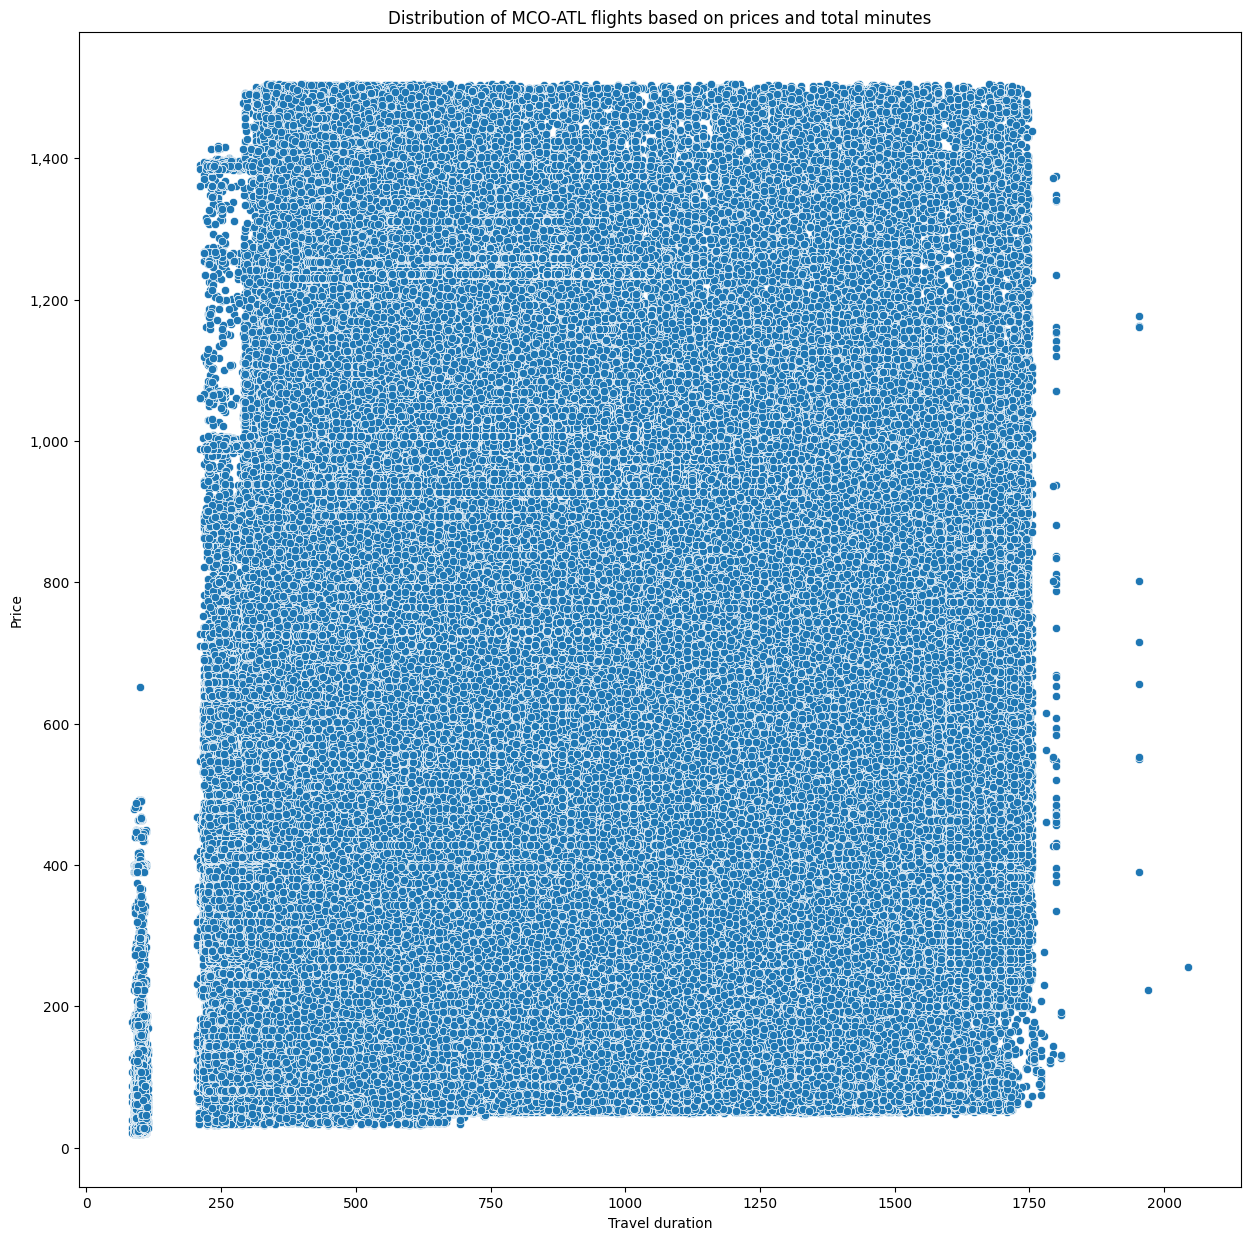

In [ ]:
# Remove outliers from the data
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

#create a scatter plot to show distribution of price and total_minutes
plt.figure(figsize=(15,15))   
sns.scatterplot(data=filtered_df, x='TOTAL_MINUTE', y='PRICE')
plt.title('Distribution of MCO-ATL flights based on prices and total minutes')
plt.xlabel('Travel duration')
plt.ylabel('Price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## number of stops and their implication on prices

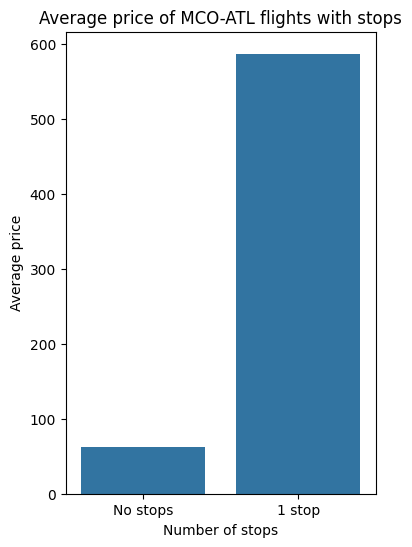

In [ ]:
#Calculate average price for flights with no stops
average_price_no_stops = filtered_df[filtered_df['STOPS'] == 0]['PRICE'].mean()

#Calculate average price for flights with 1 stop
average_price_1_stop = filtered_df[filtered_df['STOPS'] == 1]['PRICE'].mean()



#Plot a graph to show the average price for flights 
plt.figure(figsize=(4, 6))
sns.barplot(x=['No stops', '1 stop'], y=[average_price_no_stops, average_price_1_stop])
plt.title('Average price of MCO-ATL flights with stops')
plt.xlabel('Number of stops')
plt.ylabel('Average price') 
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()  

## departure time and prices, ex-MCO

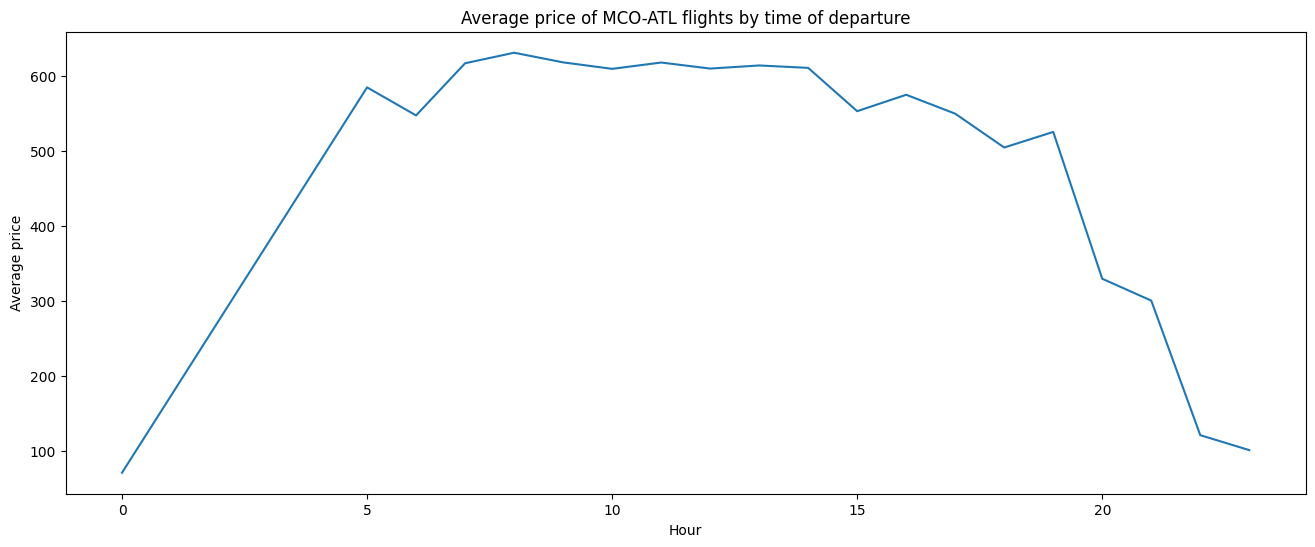

In [ ]:
# Calculate the average price of flights departing from MCO at each hour
average_prices_by_hour =filtered_df[filtered_df['DEPATURE_CITY'] == 'MCO'].groupby(filtered_df['DEPARTURE_DATETIME'].dt.hour)['PRICE'].mean().reset_index()
average_prices_by_hour.rename(columns={'DEPARTURE_DATETIME': 'DEPARTURE_HOUR'}, inplace=True)  # Rename the column

# Plot a graph to show the average price of flights departing from MCO at each hour
plt.figure(figsize=(16, 6))
sns.lineplot(data=average_prices_by_hour, x='DEPARTURE_HOUR', y='PRICE', markers=True)
plt.title('Average price of MCO-ATL flights by time of departure')
plt.xlabel('Hour')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()



## departure time and prices, ex-ATL

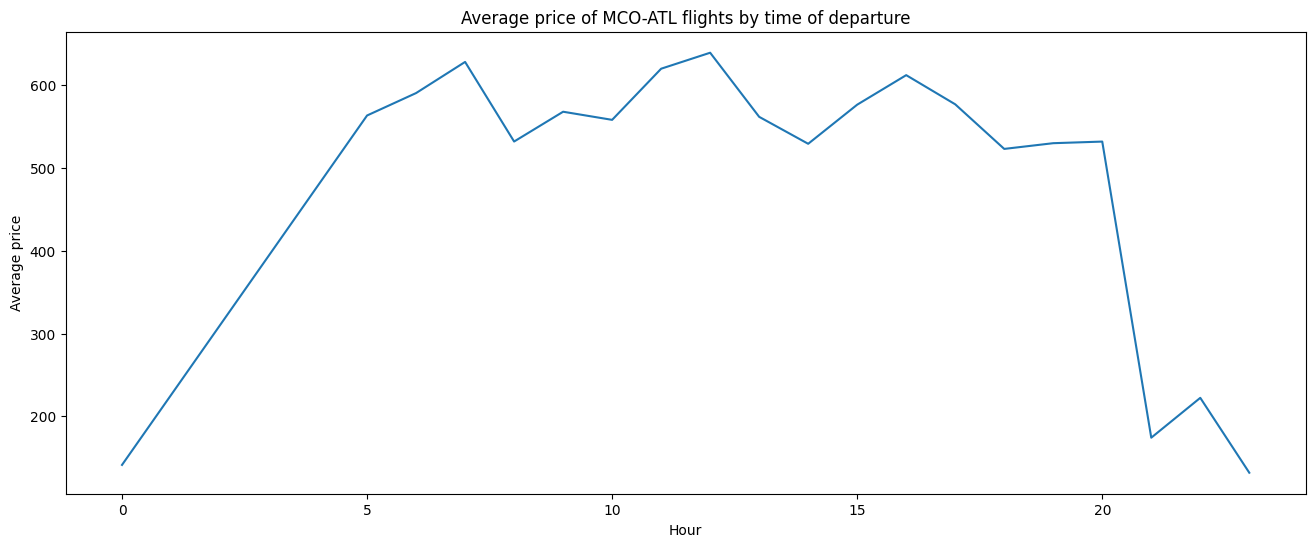

In [ ]:
# Calculate the average price of flights departing from ATL at each hour
average_prices_by_hour =filtered_df[filtered_df['DEPATURE_CITY'] == 'ATL'].groupby(filtered_df['DEPARTURE_DATETIME'].dt.hour)['PRICE'].mean().reset_index()
average_prices_by_hour.rename(columns={'DEPARTURE_DATETIME': 'DEPARTURE_HOUR'}, inplace=True)  # Rename the column

# Plot a graph to show the average price of flights departing from ATL at each hour
plt.figure(figsize=(16, 6))
sns.lineplot(data=average_prices_by_hour, x='DEPARTURE_HOUR', y='PRICE', markers=True)
plt.title('Average price of MCO-ATL flights by time of departure')
plt.xlabel('Hour')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Average prices by day of week  

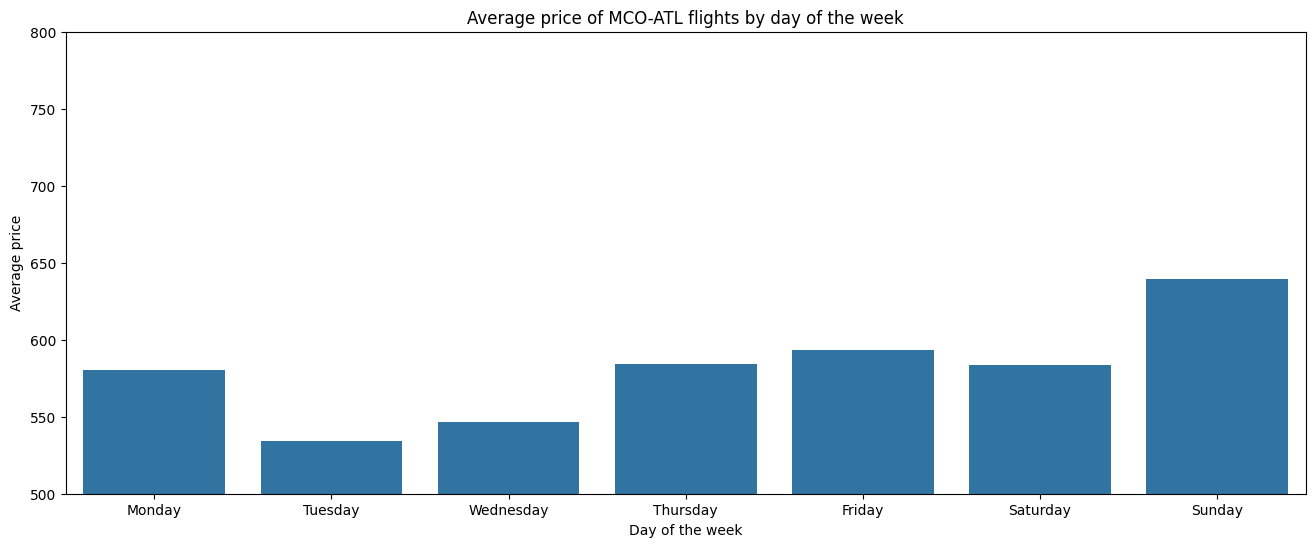

In [ ]:
#Calculate the average flight price each day of the week 
average_prices_by_day = filtered_df.groupby(filtered_df['DEPARTURE_DATETIME'].dt.dayofweek)['PRICE'].mean().reset_index()

#Rename the values of day of week
average_prices_by_day['DEPARTURE_DATETIME'] = average_prices_by_day['DEPARTURE_DATETIME'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

#Plot a bar chart to show the average flight price each day of the week 
plt.figure(figsize=(16, 6))
sns.barplot(data=average_prices_by_day, x='DEPARTURE_DATETIME', y='PRICE')
plt.title('Average price of MCO-ATL flights by day of the week')
plt.xlabel('Day of the week')   
plt.ylabel('Average price')

#change range of y-axis to begin from 2500
plt.ylim(500, 800) 

#rename the x axis labels to days of week
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

formatter = FuncFormatter(lambda x, _: format(int(x), ',')) 
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()